In [1]:
!make

gcc -Ofast -shared -fPIC -o ./build/lib_c_functions.so src/c_functions.c


In [2]:
from lib.util import RunMode, set_run_mode, load_image, process_image, parse_weight, find_all_boxes, nms, plot_boxes
from lib.model import YOLOv2
from IPython.display import Image

import lib.util as util
import lib.mytorch.conv as conv

def run_test_step5(systolic_array_mode, tile_size, fpga_file_path):
    config = {
        'run_mode': RunMode.FPGA,
        'current_step': 5,
        'systolic_array_mode': systolic_array_mode,
        'tile_size': tile_size,
        'fpga_file_path': fpga_file_path,
        'image_path': './data/input/dog.jpg',
        'output_path': './prediction.jpg',
        'weight_path': './data/weight/yolov2-tiny-voc.weights',
        'conf_thresh': 0.5,
        'nms_thresh': 0.5,
        'class_names' : ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
                   'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
                   'dog', 'horse', 'motorbike', 'person', 'pottedplant',
                   'sheep', 'sofa', 'train', 'TVmonitor'],
        'anchors' : [[1.08, 1.19], [3.42, 4.41], [6.63, 11.38], [9.42, 5.11], [16.62, 10.52]]
        }
    
    for k, v in config.items():
        util.global_config[k] = v

    set_run_mode(config['run_mode'])

    if config["run_mode"] == RunMode.FPGA:
        conv.init_FPGA(config["fpga_file_path"])

    # load weight
    yolo_weight = parse_weight(config['weight_path'])

    # preprocessing
    img = load_image(config['image_path'])
    inp = process_image(img)

    # intermediate network
    output = YOLOv2(inp, yolo_weight)

    # postprocessing
    boxes = find_all_boxes(output, config['conf_thresh'], len(config['class_names']), config['anchors'])[0]
    boxes = nms(boxes, config['nms_thresh'])
    plot_boxes(img, boxes, config['output_path'], config['class_names'])
    
    return config["output_path"]

Pad0 in RunMode.FPGA took 38.565 ms to execute.
Conv2d0 in RunMode.FPGA took 2316.071 ms to execute.
BatchNorm2d0 in RunMode.FPGA took 95.887 ms to execute.
MaxPool2d0 in RunMode.FPGA took 65.963 ms to execute.
LeakyReLU0 in RunMode.FPGA took 4.713 ms to execute.
Pad1 in RunMode.FPGA took 64.172 ms to execute.
Conv2d1 in RunMode.FPGA took 3382.349 ms to execute.
BatchNorm2d1 in RunMode.FPGA took 50.093 ms to execute.
MaxPool2d1 in RunMode.FPGA took 33.984 ms to execute.
LeakyReLU1 in RunMode.FPGA took 2.543 ms to execute.
Pad2 in RunMode.FPGA took 34.574 ms to execute.
Conv2d2 in RunMode.FPGA took 3397.172 ms to execute.
BatchNorm2d2 in RunMode.FPGA took 26.221 ms to execute.
MaxPool2d2 in RunMode.FPGA took 17.771 ms to execute.
LeakyReLU2 in RunMode.FPGA took 1.120 ms to execute.
Pad3 in RunMode.FPGA took 18.477 ms to execute.
Conv2d3 in RunMode.FPGA took 3337.306 ms to execute.
BatchNorm2d3 in RunMode.FPGA took 13.101 ms to execute.
MaxPool2d3 in RunMode.FPGA took 9.207 ms to execute

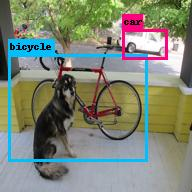

In [3]:
image_path = run_test_step5(systolic_array_mode="OS", tile_size=40, fpga_file_path="CS411_team4_step4.bit")
Image(filename=image_path)

Pad9 in RunMode.FPGA took 38.458 ms to execute.
Conv2d9 in RunMode.FPGA took 2358.855 ms to execute.
BatchNorm2d8 in RunMode.FPGA took 95.947 ms to execute.
MaxPool2d6 in RunMode.FPGA took 65.750 ms to execute.
LeakyReLU8 in RunMode.FPGA took 4.621 ms to execute.
Pad10 in RunMode.FPGA took 64.266 ms to execute.
Conv2d10 in RunMode.FPGA took 3467.689 ms to execute.
BatchNorm2d9 in RunMode.FPGA took 50.069 ms to execute.
MaxPool2d7 in RunMode.FPGA took 33.982 ms to execute.
LeakyReLU9 in RunMode.FPGA took 2.548 ms to execute.
Pad11 in RunMode.FPGA took 34.425 ms to execute.
Conv2d11 in RunMode.FPGA took 3478.892 ms to execute.
BatchNorm2d10 in RunMode.FPGA took 26.234 ms to execute.
MaxPool2d8 in RunMode.FPGA took 17.781 ms to execute.
LeakyReLU10 in RunMode.FPGA took 1.180 ms to execute.
Pad12 in RunMode.FPGA took 18.487 ms to execute.
Conv2d12 in RunMode.FPGA took 3430.537 ms to execute.
BatchNorm2d11 in RunMode.FPGA took 13.021 ms to execute.
MaxPool2d9 in RunMode.FPGA took 9.277 ms t

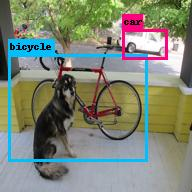

In [4]:
image_path = run_test_step5(systolic_array_mode="WS", tile_size=40, fpga_file_path="CS411_team4_step4.bit")
Image(filename=image_path)